# Haremos un analisis exploratorio sobre datos adquiridos de una base SQL.

In [424]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import mysql.connector
import statsmodels.formula.api as smf

In [11]:
cnx = mysql.connector.connect(user="root",password="********",
                                   database="clientes1")

* Carga de datos desde la base SQL
----

# 10 Productos mas rentables.

In [62]:
cursor =""" 
    SELECT ProductName, SUM(Price * Quantity) as revenue FROM OrderDetails od 
    JOIN Products p ON p.ProductID = od.ProductID 
    GROUP BY od.ProductID 
    ORDER BY Revenue DESC
    LIMIT 20
"""
top_products = pd.read_sql_query(cursor,cnx)
top_products.head()

C:\Users\Acer\AppData\Local\Temp\ipykernel_2420\3992109010.py:8: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  top_products = pd.read_sql_query(cursor,cnx)


,ProductName,revenue
0,Côte de Blaye,63096.0
1,Thüringer Rostbratwurst,20832.0
2,Raclette Courdavault,19030.0
3,Tarte au sucre,15925.0
4,Camembert Pierrot,14620.0


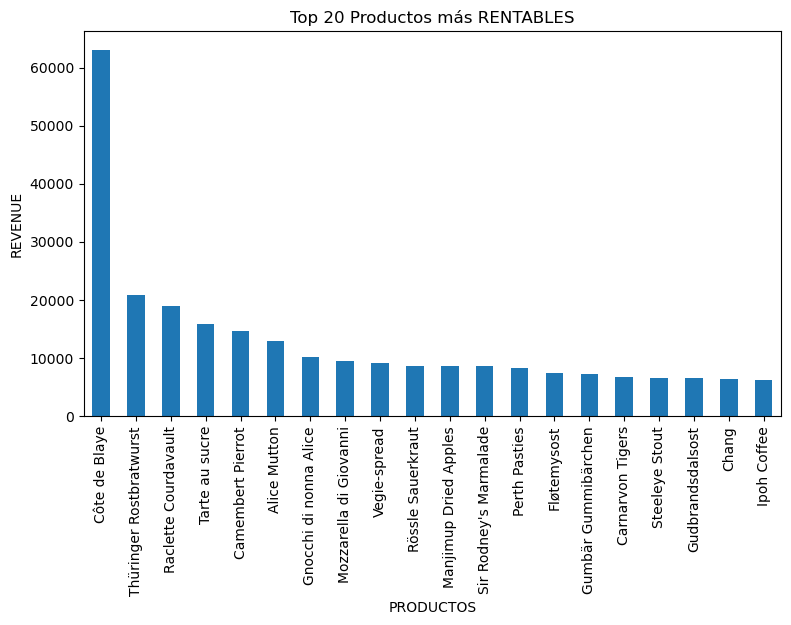

In [53]:
top_products.plot(x="ProductName",y="revenue",kind="bar" , figsize=(9,5), legend=False)

plt.title("Top 20 Productos más RENTABLES")
plt.xlabel("PRODUCTOS")
plt.ylabel("REVENUE")
plt.xticks(rotation=90)
plt.show()

**Obervación**
* Podemos ver que el producto mas rentable es el **Cote de Blaye** con una diferencia muy grande con el siguiente
* Tambien se observa que los demas productos siguen una linea casi en paralelo entre si y no se encuentran muchas diferencias 

------

# Los 10 empleados mas rentables.

In [14]:
cursor1 = """
    SELECT concat(FirstName,' ',LastName) as Employee, COUNT(*) as Total
    FROM Orders1 o
    JOIN Employees e
    ON e.EmployeeID = o.EmployeeID
    GROUP BY o.EmployeeID
    ORDER BY Total DESC
"""

top_empleados = pd.read_sql_query(cursor1,cnx)
top_empleados

C:\Users\Acer\AppData\Local\Temp\ipykernel_2420\2117212423.py:10: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  top_empleados = pd.read_sql_query(cursor1,cnx)


,Employee,Total
0,Margaret Peacock,40
1,Janet Leverling,31
2,Nancy Davolio,29
3,Laura Callahan,27
4,Andrew Fuller,20
5,Michael Suyama,18
6,Robert King,14
7,Steven Buchanan,11
8,Anne Dodsworth,6


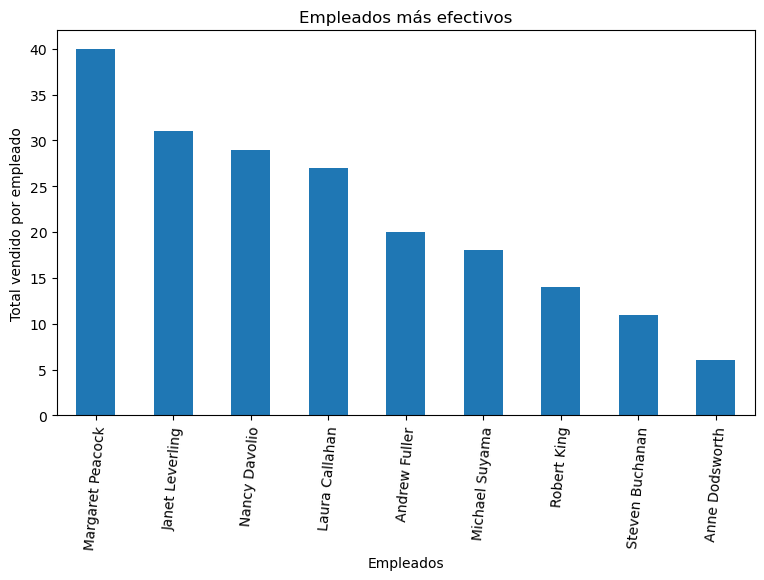

In [15]:
top_empleados.plot(x="Employee", y="Total", kind="bar" , figsize=(9,5), legend=False)
plt.xlabel("Empleados")
plt.ylabel("Total vendido por empleado")
plt.title("Empleados más efectivos")
plt.xticks(rotation=85)
plt.show()

**Observación**
* Tenemós un Empleado que sobre sale del resto con 40 ventas, luego los 3 siguíentes estan a la par entre 31 y 27
* La venta mas baja fue con 6, Hay una Gran diferencia del ultimo con el primero.
-----

# Lista de empleados que mas recaudo.

In [16]:
cursor3 = """
SELECT e.EmployeeID, CONCAT(e.LastName,' ', e.FirstName) As FullName,
SUM(o.EmployeeID)
FROM clientes1.orders1 o
INNER JOIN clientes1.employees e ON e.EmployeeID = o.EmployeeID
GROUP BY e.EmployeeID
ORDER BY FullName desc;

"""

empleados_recaudacion = pd.read_sql_query(cursor3,cnx)
empleados_recaudacion

C:\Users\Acer\AppData\Local\Temp\ipykernel_2420\3826144839.py:11: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  empleados_recaudacion = pd.read_sql_query(cursor3,cnx)


,EmployeeID,FullName,SUM(o.EmployeeID)
0,6,Suyama Michael,108.0
1,4,Peacock Margaret,160.0
2,3,Leverling Janet,93.0
3,7,King Robert,98.0
4,2,Fuller Andrew,40.0
5,9,Dodsworth Anne,54.0
6,1,Davolio Nancy,29.0
7,8,Callahan Laura,216.0
8,5,Buchanan Steven,55.0


In [247]:
empleados_recaudacion.describe()

,EmployeeID,SUM(o.EmployeeID)
count,9.000000,9.000000
mean,5.000000,94.777778
std,2.738613,60.940089
min,1.000000,29.000000
25%,3.000000,54.000000
50%,5.000000,93.000000
75%,7.000000,108.000000
max,9.000000,216.000000


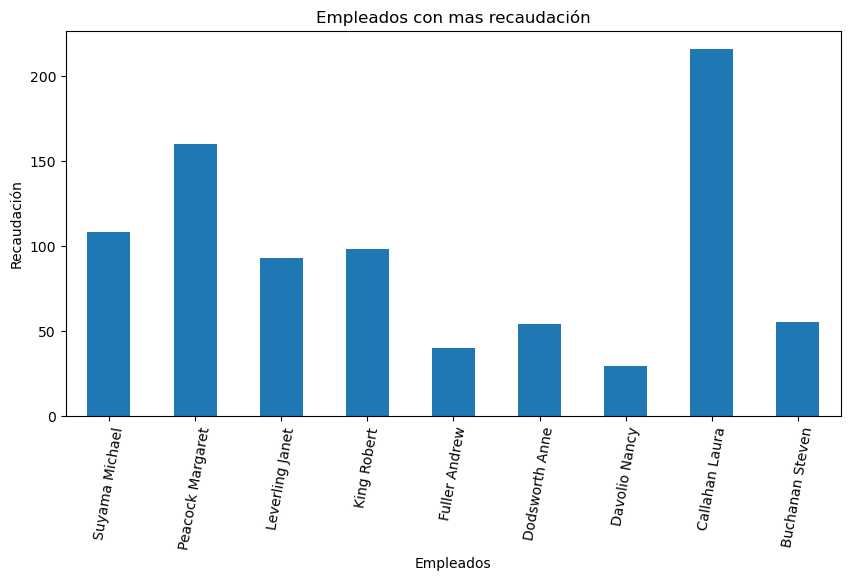

In [70]:
empleados_recaudacion.plot(x='FullName', y='SUM(o.EmployeeID)', kind="bar" , figsize=(10,5), legend=False)
plt.title("Empleados con mas recaudación")
plt.xlabel("Empleados")
plt.ylabel("Recaudación")
plt.xticks(rotation=80)
plt.show()

**Observación**
* Se puede ver que los empleados que mas recaudan son **Callahan Laura y Peacock Margaret** con una diferencia de alrededor 50 entre ellas dos 
* Hay varios empleados que estan por debajo de la media, Pero especificámente hay 4 usuarios que estan por debajo de la Desviación estándar
---------
# Crearemos una regresion lineal para agrupar los datos en diferentes categorias, en este caso los productos mas rentables a travez de los pedidos.

In [251]:
### Hacemos lo mismo que hicimos al principio agregandole el ID del producto , para saber que ID tiene cada producto ###
cursor9 =""" 
SELECT p.ProductName, p.ProductID, SUM(Price * Quantity) as revenue
FROM OrderDetails od
JOIN Products p ON p.ProductID = od.ProductID
GROUP BY p.ProductID, p.ProductName
ORDER BY revenue DESC
LIMIT 70;
"""
data_products = pd.read_sql_query(cursor9,cnx)
data_products.head()

C:\Users\Acer\AppData\Local\Temp\ipykernel_2420\3578042320.py:10: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  data_products = pd.read_sql_query(cursor9,cnx)


,ProductName,ProductID,revenue
0,Côte de Blaye,38,63096.0
1,Thüringer Rostbratwurst,29,20832.0
2,Raclette Courdavault,59,19030.0
3,Tarte au sucre,62,15925.0
4,Camembert Pierrot,60,14620.0


In [246]:
cursor10 =""" 
SELECT * from clientes1.orderdetails;
"""
data_orden = pd.read_sql_query(cursor10,cnx)
data_orden.head()

C:\Users\Acer\AppData\Local\Temp\ipykernel_2420\3943593096.py:4: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  data_orden = pd.read_sql_query(cursor10,cnx)


,OrderDetailID,OrderID,ProductID,Quantity
0,1,10248,11,12
1,2,10248,42,10
2,3,10248,72,5
3,4,10249,14,9
4,5,10249,51,40


In [258]:
lm = smf.ols(formula="Quantity~ProductID+OrderID", data=data_orden).fit()
lm.params

Intercept   -440.830530
ProductID     -0.026904
OrderID        0.045101
dtype: float64

In [259]:
lm.pvalues

Intercept    0.002821
ProductID    0.460918
OrderID      0.001584
dtype: float64

In [260]:
lm.rsquared_adj

0.01621594907387358

In [261]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Quantity   R-squared:                       0.020
Model:                            OLS   Adj. R-squared:                  0.016
Method:                 Least Squares   F-statistic:                     5.261
Date:                Tue, 18 Apr 2023   Prob (F-statistic):            0.00547
Time:                        12:17:40   Log-Likelihood:                -2237.2
No. Observations:                 518   AIC:                             4480.
Df Residuals:                     515   BIC:                             4493.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -440.8305    146.891     -3.001      0.003    -729.410    -152.251
ProductID     -0.0269      0.036     -0.738      0.461      -0.099       0.045
OrderID        0.0451      0.014      3.176      0.002       0.017       0.073
==============================================================================
Omnibus:                      127.490   Durbin-Watson:                   1.520
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              258.003
Skew:                           1.347   Prob(JB):                     9.45e-57
Kurtosis:                       5.168   Cond. No.                     1.90e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.9e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [263]:
lm_predict = lm.predict(pd.DataFrame(data_orden[["ProductID" , "OrderID"]]))
lm_predict.head()

0    21.070518
1    20.236480
2    19.429347
3    21.034906
4    20.039441
dtype: float64

In [264]:
SSD = sum((data_orden["Quantity"] - lm_predict)**2)
SSD

171100.56731647594

In [265]:
RSE = np.sqrt(SSD / (len(data_orden)-2-1))
RSE

18.22729028940199

In [266]:
lm_m = np.mean(data_orden["Quantity"])
error = RSE / lm_m
error

0.7409351306529256

**Observación**

* Podemos ver que el error que tiene la regresion lineal multiple es de 74%. Es decir que deja de explicar el 74% del modelo.
* No es una buena prediccion por que no disponemos suficientes datos, ejemplos(fechas de pedidos, cantidad de productos entregado diariamente o mensualmente, ubicación de las entregas) 
----

## lo que haremos aca es que Scikit-Learn nos cree un modelo más acorde 

In [267]:
from sklearn.feature_selection import RFE
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split

In [271]:
feature_cols = ["OrderID" , "ProductID", "Quantity"]

X = data_orden[feature_cols]
Y = data_orden["Quantity"]

### Creamos un estimador (SVR) lineal, Hacemos lo mismo con el selector y con un fit lo unimos 
estimator = SVR(kernel="linear")
selector = RFE(estimator, n_features_to_select=2, step=1)
selector = selector.fit(X,Y)

print(selector.support_ , selector.ranking_)

[ True False  True] [1 2 1]


**Observación**
* Vemos que la mejor opcion para crear una variable predictora es OrderID y Quantity. Pero usaremos las 3 por los pocos datos que contenemos por el momento.
-----

In [273]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

In [274]:
x_pred = X[["OrderID","ProductID","Quantity",]]
lm2 = LinearRegression()
lm2.fit(x_pred,Y)

LinearRegression()

In [275]:
print('Donde cortara el eje ALPHA',lm2.intercept_)
print('Loes coeficientes de (Order , Quantity)', lm2.coef_ )

Donde cortara el eje ALPHA 1.1013412404281553e-13
Loes coeficientes de (Order , Quantity) [-1.10694049e-17 -7.06093707e-17  1.00000000e+00]


In [276]:
lm2.score(x_pred,Y)

1.0


**Observación**
* Se puede obsevar que tenemos un R2 de 1.0 .
    * Que puede significar que el modelo ajustado puede explicar perfectamente la varianza en la variable dependiente, que el modelo es un ajuste perfecto para los datos y puede predecir con precisión.
    * Sin embargo también puede indicar que el modelo está muy sobreajustando los datos, Esto puede llevar a un modelo que no generalice bien a nuevos datos y, por lo tanto, no sea útil en su predicción
    * Para poder evitarlo buscaremos el error de la predicción.
    -----

In [286]:
### Dividir los datos en conjunto de entrenamiento y prueba
x_train , x_test , y_train, y_test =train_test_split(X,Y , test_size=0.25, random_state=42)

#### Ajustar el modelo de regresion lineal utilizando las variables 
x_pred_train = x_train[["OrderID","ProductID","Quantity"]]
lm2 = LinearRegression()
lm2.fit(x_pred_train , y_train)

LinearRegression()

In [287]:
#### Predeciremos los valores de 'Y' utilizando las variables independientes de prueba
x_pred_test = x_test[["OrderID","ProductID","Quantity"]]
y_pred_test = lm2.predict(x_pred_test)

In [288]:
### Calcularemos el coeficiente de determinación R2 y el error de predicción en el conjunto de prueba
r2 = r2_score(y_test, y_pred_test)
mse = mean_squared_error(y_test , y_pred_test)

print("R² en el conjunto de prueba:", r2)
print("Error de predicción (MSE) en el conjunto de prueba:", mse)

R² en el conjunto de prueba: 1.0
Error de predicción (MSE) en el conjunto de prueba: 7.548981676909437e-29


**Observación**
* MSE = Mide el promedio de los errores elevados al cuadrado. Cuanto mayor sea este valor, peor es el promedio.
* Como podemos ver sigue teniendo los mismo resultados el R2 aunque el error en la prediccion (MSE) es algo bueno.
* Ahora intentaremos ver como se comporta haciendo una variable dummy o con otra variables predictora, en este caso usaremos la validación cruzada o un árbol de decisión. si vemos que arroja resultados similares entonces podremos hacer una buena predicción a futuro.
    * DUMMY = son variables indicadoras, son variables artificiales creadas para representar algun atributo con dos o muchos mas niveles o categorias diferentes.
------

In [303]:
dummy_orden = pd.get_dummies(data_orden["OrderID"] , prefix="OrderID")
dummy_product = pd.get_dummies(data_orden["ProductID"] , prefix="ProductID")
dummy_concat = pd.concat([dummy_orden,dummy_product], axis=1, sort=False)
dummy_concat.head()

,OrderID_10248,OrderID_10249,OrderID_10250,OrderID_10251,OrderID_10252,OrderID_10253,OrderID_10254,OrderID_10255,OrderID_10256,OrderID_10257,...,ProductID_68,ProductID_69,ProductID_70,ProductID_71,ProductID_72,ProductID_73,ProductID_74,ProductID_75,ProductID_76,ProductID_77
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [304]:
x = dummy_concat
y = data_orden["Quantity"]
lm3 = LinearRegression()
lm3.fit(x,y)

LinearRegression()

In [307]:
print(lm3.intercept_)

587622452110425.9


In [308]:
lm3.score(x,y)

0.6522396910354901

**Observación** 
* Vemos que haciendo una dummificación podemos obtener un resultado mas "acorde". Obtenemos un R2 de %65.22 que es un resultado medio bajo para el modelo. Obviamente el modelo podria mejorar si obtendriamos muchos mas datos como los anteriormente nombrados.

----

## Crearemos un árbol de decisión.

In [324]:
data_orden.Quantity.unique()

array([ 12,  10,   5,   9,  40,  35,  15,   6,  20,  25,  42,  21,  30,
        50,  65,   1,  16,   2,  60,  28,  36,  70,   4,  24,  33,   7,
         8,  18,   3,  45, 100,  14,  80,  48,  56,  13,  77,  54,  55,
        32, 120,  49,  90], dtype=int64)

In [329]:
colnames = data_orden.columns.values.tolist()
predictors = colnames[1:3]
target = colnames[3]

(array([150.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 368.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

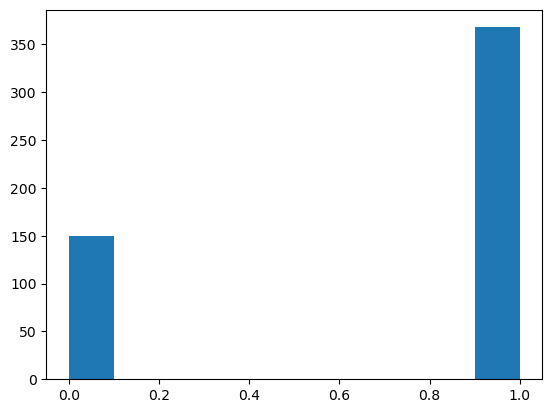

In [342]:
### Separamos en grupos de entrenamiento y de validación ###
data_orden["is_train"] = (np.random.uniform(0,1,len(data_orden))<=0.70).astype(int)
plt.hist(data_orden.is_train)

In [345]:
### Creamos el árbol de decisión. 
from sklearn.tree import DecisionTreeClassifier

train , test = data_orden[data_orden["is_train"]==True] , data_orden[data_orden["is_train"] == False]

In [346]:
tree = DecisionTreeClassifier(criterion='entropy' , min_samples_split=25 ,random_state=42)
tree.fit(train[predictors] , train[target])

DecisionTreeClassifier(criterion='entropy', min_samples_split=25,
                       random_state=42)

In [348]:
### Usamos el árbol creado para predecir los valores de los otros %30
preds = tree.predict(test[predictors])

### Cruzamos los datos para ver los resultados entre si

pd.crosstab(test[target] ,preds, rownames=["Actual"] , colnames=["Prediccion"])
tree.score(train[predictors] , train[target])

0.21467391304347827

In [349]:
tree.score(test[predictors], test[target])

0.03333333333333333

**Observación** 
* Podremos observar que tanto para el grupo de test y de entrenamiento son resultados realmente bajos.
* haremos ahora una Cross Validation para ver si mejor algo el modelo y luego terminaremos con un **Random Forest**.
----

## Cross Validation.

In [354]:
import sklearn.metrics
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

x = data_orden[predictors]
y = data_orden[target]

tree1 = DecisionTreeClassifier(criterion='entropy' , max_depth=5 , min_samples_split=25, random_state=42)
tree1.fit(x,y)

DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_split=25,
                       random_state=42)

In [360]:
cv = KFold(n_splits=20 , shuffle=True , random_state=1)

In [361]:
score = np.mean(cross_val_score(tree1,x,y,scoring='accuracy' , cv=cv , n_jobs=1))
score

0.09276923076923078

**Observación**
* Obtenemos un resultado realmente malo. intentaremos con un random forest para ver si mejora
* Tengamos en cuenta que no disponemos de muchos datos, si tendriamos realmente datos mas profundos seria mucho mejor

In [362]:
### Vemos el resultado de los 20 arboles creados y son resultados muy bajos
cross_val_score(tree1,x,y,scoring='accuracy', cv=cv ,  n_jobs=1)

array([0.11538462, 0.11538462, 0.03846154, 0.11538462, 0.07692308,
       0.11538462, 0.03846154, 0.15384615, 0.07692308, 0.07692308,
       0.07692308, 0.15384615, 0.11538462, 0.03846154, 0.03846154,
       0.07692308, 0.11538462, 0.07692308, 0.04      , 0.2       ])

In [363]:
from sklearn.ensemble import RandomForestClassifier

In [373]:
forest = RandomForestClassifier(n_jobs=3 , oob_score=True , n_estimators=500)
forest.fit(x,y)

RandomForestClassifier(n_estimators=500, n_jobs=3, oob_score=True)

In [374]:
forest.oob_decision_function_

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.05154639, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.20942408, 0.        ,
        0.        ],
       [0.        , 0.01117318, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.00588235, 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [375]:
forest.oob_score_

0.02895752895752896

# En Resumen podremos decir que obtuvimos un valor mas acorde cuando hicimos la dumificación. con los demas tipo de algoritmos nos dio unos resultados que no eran los esperados.

* # Tenemos resultados muy adversos, son por varios motivos en si.


* # Los datos que disponemos no son los suficientes para poder mejorar el resultado que obtuvimós 


* # Investigare para poder conseguir mas datos y mejorar el modelo , lo estare subiendo en esta semana o la proxima.


* # Mejore los hiperparametros para obtener los mejores resultados y son los que estan.